In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv")
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
categorical_values=['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes',
                   'Depression','Stroke','Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders',
                   'Constipation','Diagnosis']

continuous_values=['Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP','CholesterolTotal',
                  'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','UPDRS','MoCA','FunctionalAssessment']

print(f'total categorical variables = {len(categorical_values)}')
print(f'total continuous variables = {len(continuous_values)}')

total categorical variables = 18
total continuous variables = 15


In [6]:
dt=data.iloc[:,1:-1]
dt.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0


In [7]:
dt.shape

(2105, 33)

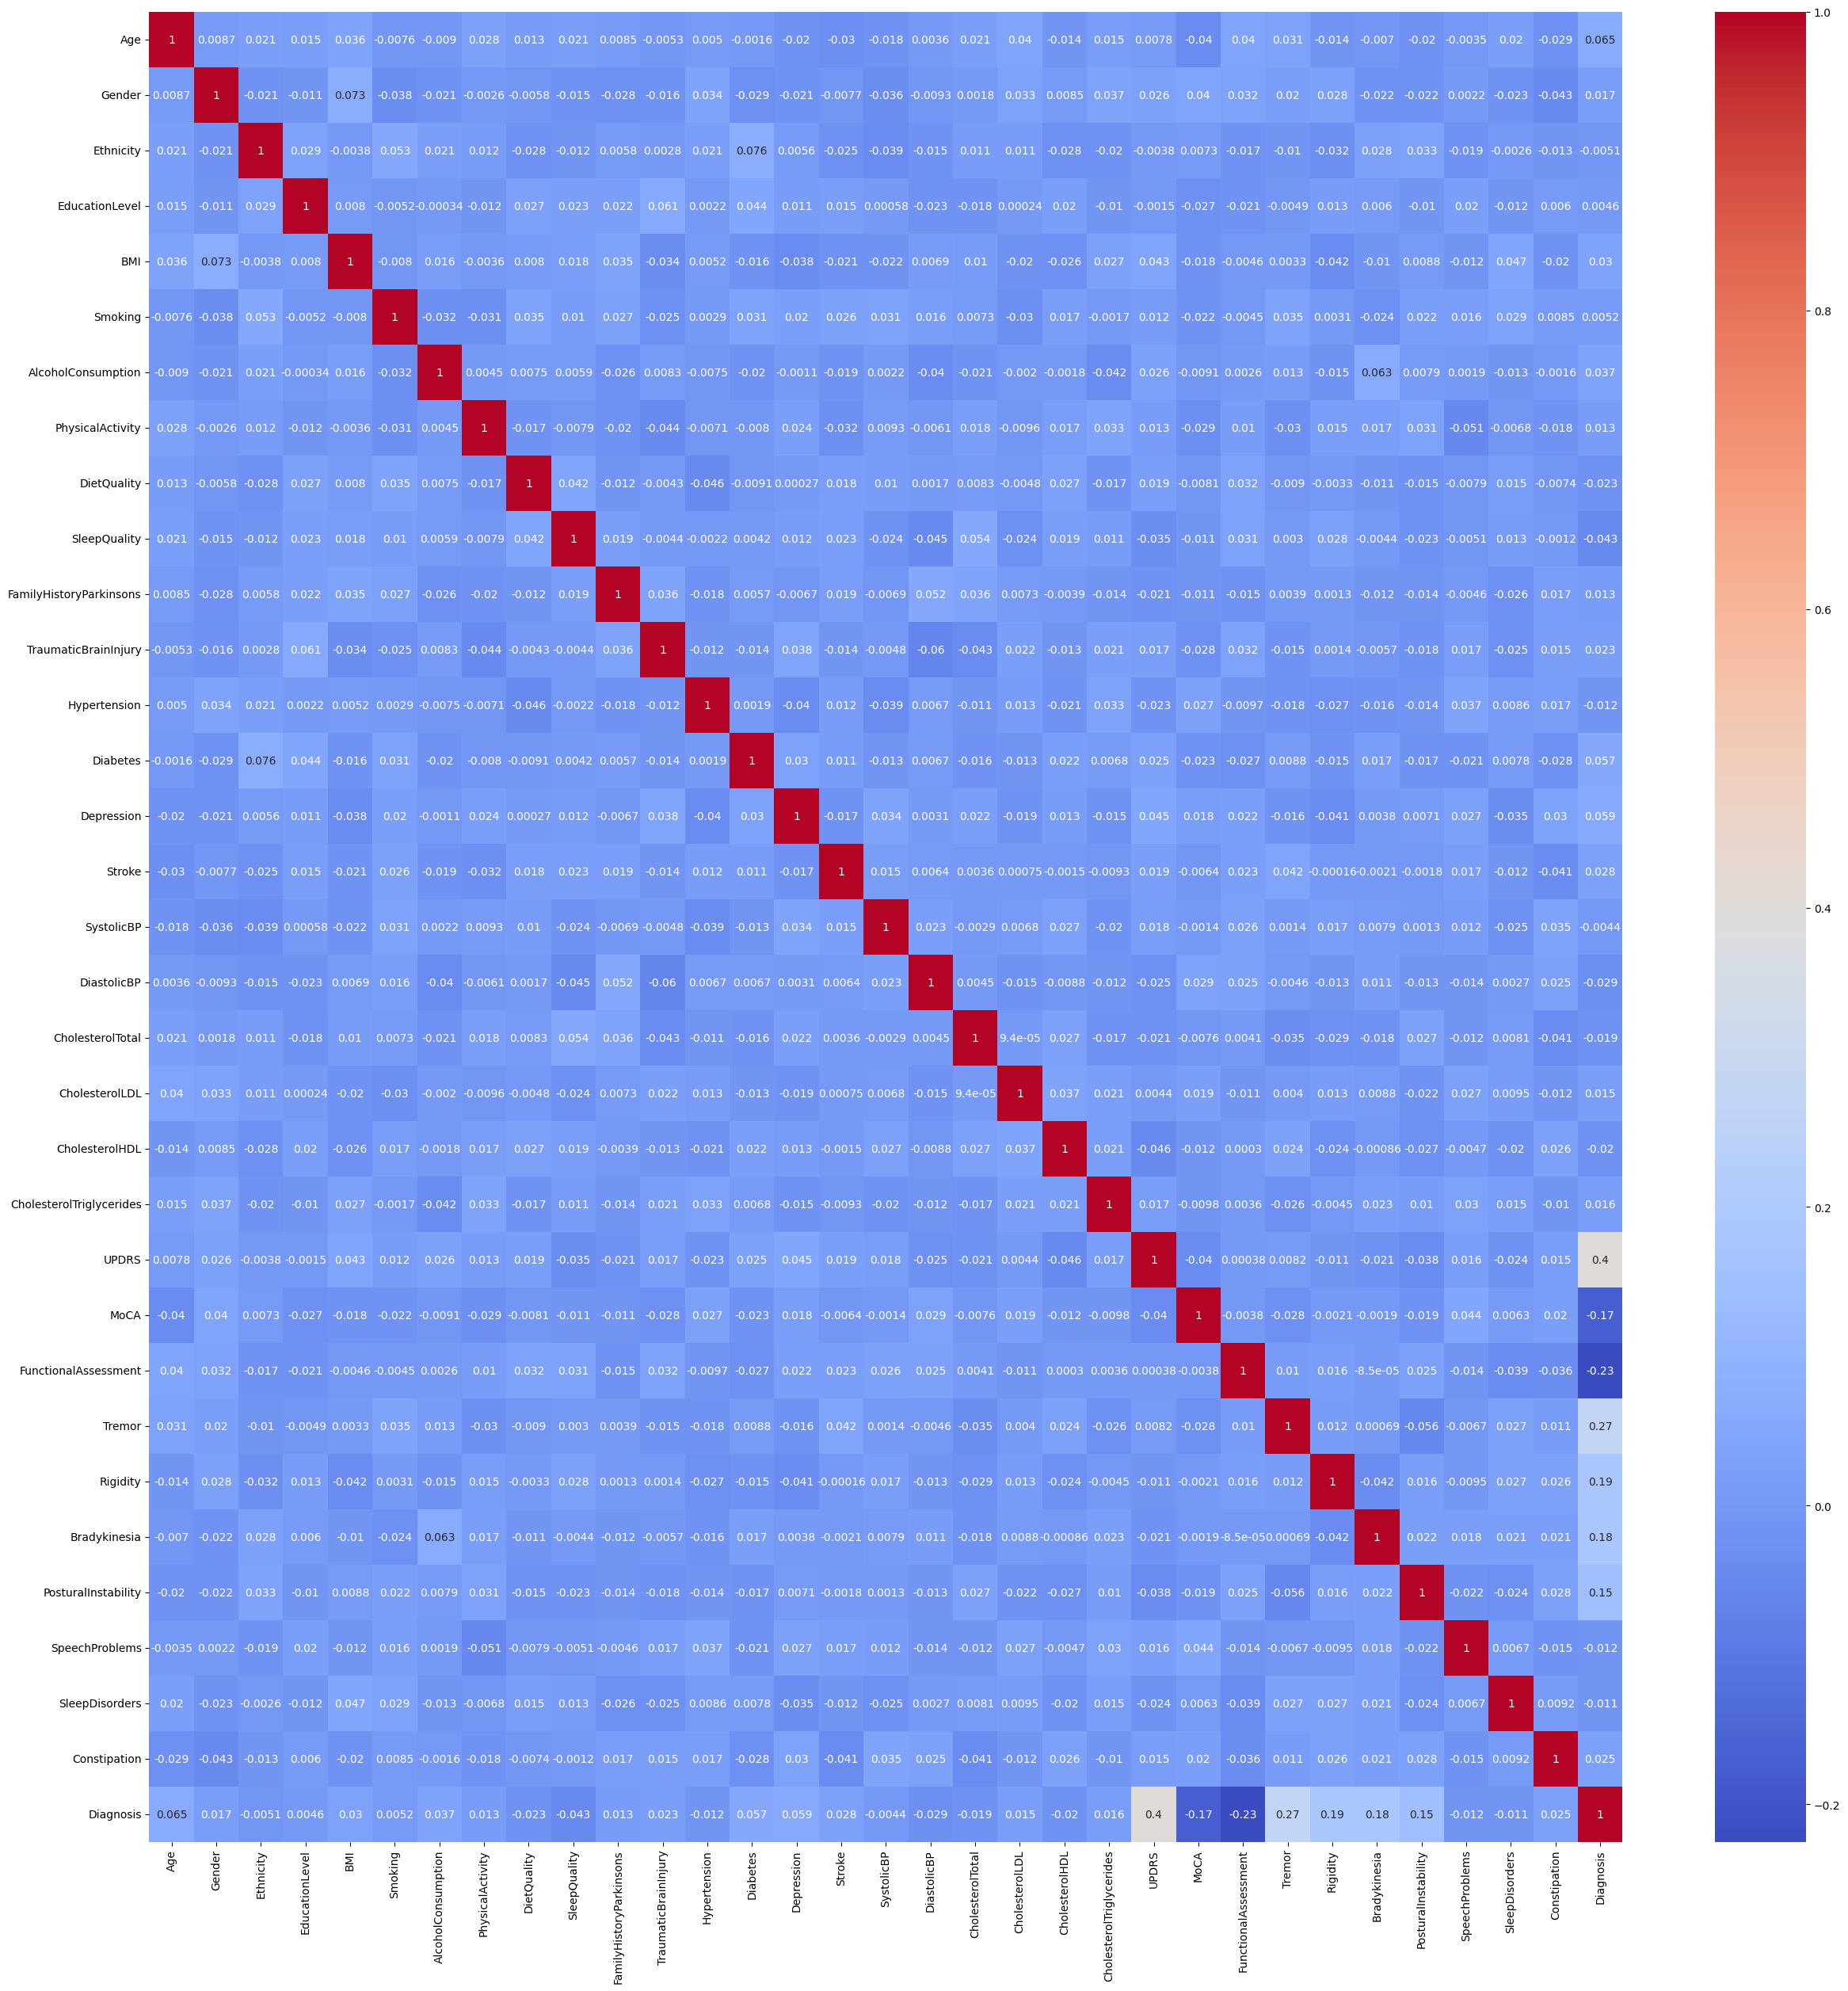

In [8]:
corr=dt.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [9]:
x=dt.iloc[:,:-1].values
x.shape

(2105, 32)

In [10]:
cols=dt.columns[:-1]
cols
cols.shape

(32,)

In [11]:
y=dt['Diagnosis'].values
y.shape

(2105,)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_test.shape}')

x_train shape: (1473, 32)
y_train shape: (1473,)
x_test shape: (632, 32)
y_train shape: (632,)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [15]:
x_train_ann=x_train.reshape((1473, 32,1))
x_test_ann=x_test.reshape((632, 32,1))

In [16]:
from keras.utils import to_categorical

y_train_cnn=to_categorical(y_train,2)
y_test_cnn=to_categorical(y_test,2)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def create_model(input_shape):
    model = Sequential()
    
    # Convolutional Layer 1
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    
    # Convolutional Layer 2
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten Layer
    model.add(Flatten())
    
    # Dense Layer 1
    model.add(Dense(128, activation='relu'))
    
    # Dropout Layer
    model.add(Dropout(0.3))
    
    # Output Layer
    model.add(Dense(2, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [18]:
DNN1=create_model((32,1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
DNN1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 13, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,690 (291.76 KB)

 Trainable params: 74,690 (291.76 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = DNN1.fit(x_train_ann, y_train_cnn, epochs=50, batch_size=32,verbose=1)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6064 - loss: 0.6632
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7220 - loss: 0.5833
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7708 - loss: 0.5062
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8062 - loss: 0.4323
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8355 - loss: 0.3821
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8260 - loss: 0.4063
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.3475
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8491 - loss: 0.3560
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.3453
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8833 - loss: 0.2997
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.2738
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8941 - lo

In [21]:
y_predd_probs = DNN1.predict(x_test_ann)

y_predd = (y_predd_probs > 0.5).astype(int)  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [27]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [23]:
accuracy = accuracy_score(y_test_cnn, y_predd)
print("Accuracy:",accuracy)

Accuracy: 0.8180379746835443


In [24]:
y_pred_labels = y_predd.argmax(axis=1)
y_test_labels = y_test_cnn.argmax(axis=1)

In [25]:
rec=recall_score(y_test_labels,y_pred_labels)
print("Recall",rec)

Recall 0.8501228501228502


In [28]:
confusion_matrix(y_test_labels,y_pred_labels)

array([[173,  52],
       [ 61, 346]])

In [29]:
from lime import lime_tabular
import numpy as np

# Initialize LIME Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=x_train_ann.reshape(x_train_ann.shape[0], -1),
    feature_names=cols,
    class_names=['Non-Parkinsons', 'Parkinsons'],
    mode='classification'
)

# Choose a test sample to explain
test_sample_index = 0
test_sample = x_test_ann[test_sample_index].reshape(1, -1)

# Predict probabilities for the test sample
probs = DNN1.predict(test_sample.reshape(1, 32, 1)).ravel()

# Generate explanation for the test sample
exp = explainer.explain_instance(
    data_row=test_sample.flatten(),
    predict_fn=lambda x: DNN1.predict(x.reshape(-1, 32, 1))
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


DeepExplainer encountered an issue: 'tuple' object has no attribute 'as_list'
Switching to KernelExplainer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


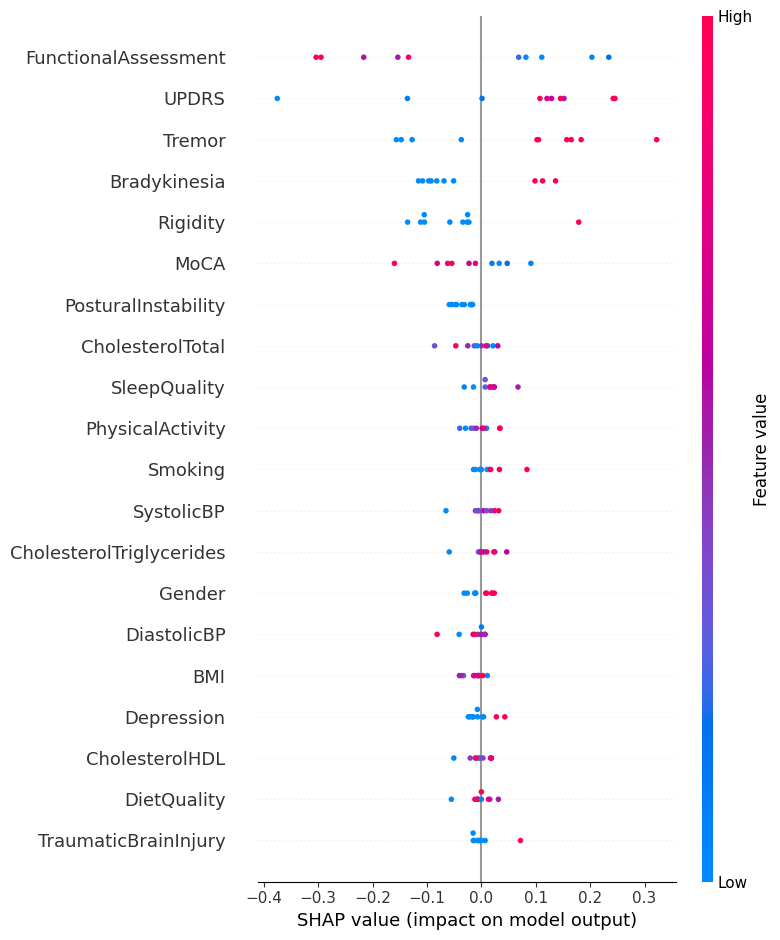

In [36]:
import shap
import numpy as np
import tensorflow as tf

# Ensure a smaller subset of training data for initialization
x_train_subset = x_train_ann[:50]  # Ensure subset size is reasonable for memory

try:
    # Initialize SHAP DeepExplainer with proper input shape
    explainer_shap = shap.DeepExplainer(DNN1, x_train_subset)

    # Select a few test samples and reshape to match the model input
    x_test_samples = x_test_ann[:10]

    # Compute SHAP values
    shap_values = explainer_shap.shap_values(x_test_samples)

    # Visualize SHAP values for the first test sample
    shap.initjs()
    shap.force_plot(
        explainer_shap.expected_value[1],  # Expected value for class 1
        shap_values[1][0],                # SHAP values for the first test sample (class 1)
        feature_names=cols
    )

    # Summary plot for global feature importance
    shap.summary_plot(
        shap_values[1],                      # SHAP values for class 1
        x_test_samples.reshape(10, -1),     # Flatten input for summary plot
        feature_names=cols
    )

except Exception as e:
    print(f"DeepExplainer encountered an issue: {e}")
    print("Switching to KernelExplainer...")

    # Fallback to KernelExplainer
    explainer_kernel = shap.KernelExplainer(
        model=lambda x: DNN1.predict(x.reshape((-1, 32, 1))),  # Match model input shape
        data=x_train_ann[:50].reshape(50, -1)                  # Flatten input for KernelExplainer
    )

    # Compute SHAP values for test samples
    shap_values_kernel = explainer_kernel.shap_values(x_test_ann[:10].reshape(10, -1))

    # Summary plot
    shap.summary_plot(
        shap_values_kernel[1],                # SHAP values for class 1
        x_test_ann[:10].reshape(10, -1),      # Flatten input for summary plot
        feature_names=cols
    )


# **DNN2**

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_dnn_model(input_shape):
    model = Sequential()
    
    # Dense Layer 1
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    
    # Dense Layer 2
    model.add(Dense(64, activation='relu'))
    
    # Output Layer
    model.add(Dense(2, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [38]:
DNN2=create_dnn_model((32))

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [39]:
DNN2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,610 (49.26 KB)

 Trainable params: 12,610 (49.26 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = DNN2.fit(x_train_ann, y_train_cnn, epochs=10, batch_size=32,verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5856 - loss: 0.6474
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4420
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.3638
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.3394
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.2969
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.2738
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8943 - loss: 0.2852
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9124 - loss: 0.2559
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9083 - loss: 0.2516
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.2115


In [41]:
y_predd_probs = DNN2.predict(x_test_ann)

y_predd = (y_predd_probs > 0.5).astype(int)  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
accuracy = accuracy_score(y_test_cnn, y_predd)
print("Accuracy:",accuracy)

Accuracy: 0.810126582278481


In [43]:
y_pred_labels = y_predd.argmax(axis=1)
y_test_labels = y_test_cnn.argmax(axis=1)

In [44]:
rec=recall_score(y_test_labels,y_pred_labels)
print("Recall",rec)

Recall 0.8673218673218673


In [45]:
confusion_matrix(y_test_labels,y_pred_labels)

array([[169,  56],
       [ 54, 353]])

In [46]:
from lime import lime_tabular
import numpy as np

# Initialize LIME Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=x_train_ann.reshape(x_train_ann.shape[0], -1),
    feature_names=cols,
    class_names=['Non-Parkinsons', 'Parkinsons'],
    mode='classification'
)

# Choose a test sample to explain
test_sample_index = 0
test_sample = x_test_ann[test_sample_index].reshape(1, -1)

# Predict probabilities for the test sample
probs = DNN2.predict(test_sample.reshape(1, 32, 1)).ravel()

# Generate explanation for the test sample
exp = explainer.explain_instance(
    data_row=test_sample.flatten(),
    predict_fn=lambda x: DNN2.predict(x.reshape(-1, 32, 1))
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


DeepExplainer encountered an issue: 'tuple' object has no attribute 'as_list'
Switching to KernelExplainer...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


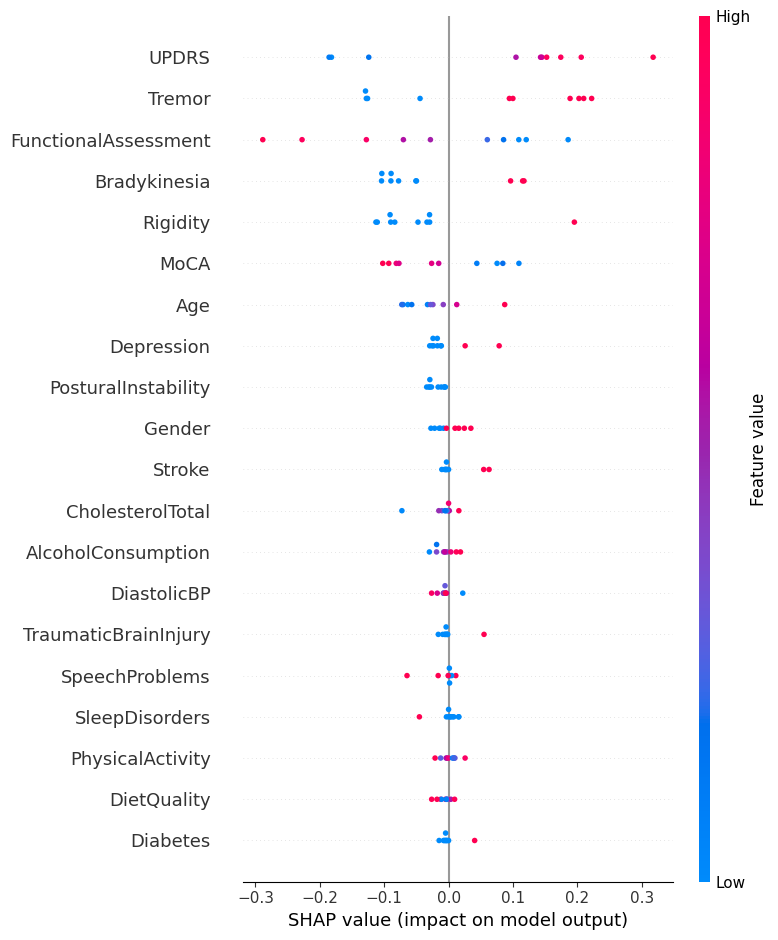

In [47]:
import shap
import numpy as np
import tensorflow as tf

# Ensure a smaller subset of training data for initialization
x_train_subset = x_train_ann[:50]  # Ensure subset size is reasonable for memory

try:
    # Initialize SHAP DeepExplainer with proper input shape
    explainer_shap = shap.DeepExplainer(DNN2, x_train_subset)

    # Select a few test samples and reshape to match the model input
    x_test_samples = x_test_ann[:10]

    # Compute SHAP values
    shap_values = explainer_shap.shap_values(x_test_samples)

    # Visualize SHAP values for the first test sample
    shap.initjs()
    shap.force_plot(
        explainer_shap.expected_value[1],  # Expected value for class 1
        shap_values[1][0],                # SHAP values for the first test sample (class 1)
        feature_names=cols
    )

    # Summary plot for global feature importance
    shap.summary_plot(
        shap_values[1],                      # SHAP values for class 1
        x_test_samples.reshape(10, -1),     # Flatten input for summary plot
        feature_names=cols
    )

except Exception as e:
    print(f"DeepExplainer encountered an issue: {e}")
    print("Switching to KernelExplainer...")

    # Fallback to KernelExplainer
    explainer_kernel = shap.KernelExplainer(
        model=lambda x: DNN2.predict(x.reshape((-1, 32, 1))),  # Match model input shape
        data=x_train_ann[:50].reshape(50, -1)                  # Flatten input for KernelExplainer
    )

    # Compute SHAP values for test samples
    shap_values_kernel = explainer_kernel.shap_values(x_test_ann[:10].reshape(10, -1))

    # Summary plot
    shap.summary_plot(
        shap_values_kernel[1],                # SHAP values for class 1
        x_test_ann[:10].reshape(10, -1),      # Flatten input for summary plot
        feature_names=cols
    )


# **DNN3**

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def create_rnn_model(input_shape):
    model = Sequential()
    
    # SimpleRNN Layer
    model.add(SimpleRNN(128, activation='relu', input_shape=input_shape))
    
    # Dense Layer 1
    model.add(Dense(32, activation='relu'))
    
    # Output Layer
    model.add(Dense(2, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [82]:
DNN3=create_rnn_model((32,1))

In [83]:
DNN3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,834 (81.38 KB)

 Trainable params: 20,834 (81.38 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = DNN3.fit(x_train_ann, y_train_cnn, epochs=20, batch_size=32,verbose=1)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5684 - loss: 0.6725
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6470 - loss: 0.6150
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7505 - loss: 0.5403
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7646 - loss: 0.4768
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8282 - loss: 0.4123
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8286 - loss: 0.3821
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8530 - loss: 0.3302
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8486 - loss: 0.3537
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8345 - loss: 0.3965
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8622 - loss: 0.3240
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8833 - loss: 0.2918
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy:

In [85]:
y_predd_probs = DNN3.predict(x_test_ann)

y_predd = (y_predd_probs > 0.5).astype(int)  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [86]:
y_pred_labels = y_predd.argmax(axis=1)
y_test_labels = y_test_cnn.argmax(axis=1)

In [87]:
accuracy = accuracy_score(y_test_cnn, y_predd)
print("Accuracy:",accuracy)

Accuracy: 0.8306962025316456


In [88]:
rec=recall_score(y_test_labels,y_pred_labels)
print("Recall",rec)

Recall 0.8722358722358723


In [89]:
confusion_matrix(y_test_labels,y_pred_labels)

array([[173,  52],
       [ 52, 355]])

# **DNN4**

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_dnn_model(input_shape):
    model = Sequential()
    
    # Dense Layer 1
    model.add(Dense(64, activation='relu', input_dim=input_shape))
    
    # Dense Layer 2
    model.add(Dense(32, activation='relu'))
    
    # Output Layer
    model.add(Dense(2, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model




In [117]:
DNN4=create_dnn_model(32)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
DNN4.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,258 (16.63 KB)

 Trainable params: 4,258 (16.63 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
history = DNN4.fit(x_train_ann, y_train_cnn, epochs=40, batch_size=32,verbose=1)

Epoch 1/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5766 - loss: 0.6780
Epoch 2/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7476 - loss: 0.5532
Epoch 3/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4651
Epoch 4/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4189
Epoch 5/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8330 - loss: 0.3709
Epoch 6/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.3574
Epoch 7/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3400
Epoch 8/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.3274
Epoch 9/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.3145
Epoch 10/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3263
Epoch 11/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.2968
Epoch 12/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - lo

In [120]:
y_predd_probs = DNN4.predict(x_test_ann)

y_predd = (y_predd_probs > 0.5).astype(int)  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [121]:
accuracy = accuracy_score(y_test_cnn, y_predd)
print("Accuracy:",accuracy)

Accuracy: 0.7943037974683544


In [122]:
y_pred_labels = y_predd.argmax(axis=1)
y_test_labels = y_test_cnn.argmax(axis=1)

In [123]:
rec=recall_score(y_test_labels,y_pred_labels)
print("Recall",rec)

Recall 0.8304668304668305


In [124]:
confusion_matrix(y_test_labels,y_pred_labels)

array([[168,  57],
       [ 69, 338]])

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of true labels (y_test_labels) vs predicted labels (y_pred_labels)
plt.figure(figsize=(8, 6))

# Scatter plot: x-axis -> true labels, y-axis -> predicted labels
plt.scatter(y_test_labels, y_pred_labels, color='blue', alpha=0.5)

# Adding labels and title
plt.title('Scatter Plot of True Labels vs Predicted Labels')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.xticks([0, 1])
plt.yticks([0, 1])

# Show the plot
plt.show()
